In [1]:
# loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [2]:
# loading train dataset
train = pd.read_csv(r'D:\Purity\DatasourceAI\online purchase\train.csv')
# train shape
print(train.shape)
# checking for duplicates
print(train.id.unique().shape)
# dataframe
train.head()

(8631, 19)
(8631,)


,id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,revenue
0,1,0,0.0,0,0.0,5,81.083333,0.04,0.050000,0.0,0.0,Dec,3,2,1,2,New_Visitor,False,0
1,2,0,0.0,0,0.0,3,189.000000,0.00,0.066667,0.0,0.0,Mar,3,2,8,1,Returning_Visitor,False,0
2,3,0,0.0,1,132.0,8,445.000000,0.00,0.014286,0.0,0.0,Mar,3,2,4,14,Returning_Visitor,True,0
3,4,0,0.0,0,0.0,3,0.000000,0.20,0.200000,0.0,0.0,Mar,1,8,2,1,Returning_Visitor,False,0
4,5,0,0.0,0,0.0,4,14.000000,0.10,0.150000,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


In [3]:
# loading test dataset
test = pd.read_csv(r'D:\Purity\DatasourceAI\online purchase\test.csv')
# test shape
print(test.shape)
# checking duplicates
print(test.id.unique().shape)
# dataframe
test.head()

(3699, 18)
(3699,)


,id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,1,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0.0,Nov,1,8,6,11,Returning_Visitor,False
1,2,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0.0,Mar,2,2,3,2,Returning_Visitor,False
2,3,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0.0,Nov,2,2,2,2,Returning_Visitor,False
3,4,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0.0,Aug,2,5,7,4,Returning_Visitor,False
4,5,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0.0,Aug,2,2,3,1,Returning_Visitor,True


In [4]:
# merging train and test dataset for preprocessing
frames = [train,test]
df = pd.concat(frames, keys=['x', 'y'])

df


id  Administrative  Administrative_Duration  Informational  \
x 0        1               0                      0.0              0   
  1        2               0                      0.0              0   
  2        3               0                      0.0              1   
  3        4               0                      0.0              0   
  4        5               0                      0.0              0   
...      ...             ...                      ...            ...   
y 3694  3695               0                      0.0              0   
  3695  3696               2                     35.2              2   
  3696  3697               0                      0.0              0   
  3697  3698               1                     23.2              0   
  3698  3699               1                     15.0              1   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
x 0                        0.0               5                81.083333   
  1                        0.0               3               189.000000   
  2                      132.0               8               445.000000   
  3                        0.0               3                 0.000000   
  4                        0.0               4                14.000000   
...                        ...             ...                      ...   
y 3694                     0.0              12              1165.333333   
  3695                    98.8              84              8365.602222   
  3696                     0.0              10               196.500000   
  3697                     0.0              30               964.466667   
  3698                     4.0              49               711.363095   

        BounceRates  ExitRates  PageValues  SpecialDay Month  \
x 0        0.040000   0.050000    0.000000         0.0   Dec   
  1        0.000000   0.066667    0.000000         0.0   Mar   
  2        0.000000   0.014286    0.000000         0.0   Mar   
  3        0.200000   0.200000    0.000000         0.0   Mar   
  4        0.100000   0.150000    0.000000         0.0   Mar   
...             ...        ...         ...         ...   ...   
y 3694     0.004167   0.043056    0.000000         0.0   Mar   
  3695     0.008915   0.037209    0.000000         0.0   Sep   
  3696     0.044444   0.066667    0.000000         0.6   May   
  3697     0.000000   0.003571   51.033625         0.0   Oct   
  3698     0.000000   0.002041    0.000000         0.0   Dec   

        OperatingSystems  Browser  Region  TrafficType        VisitorType  \
x 0                    3        2       1            2        New_Visitor   
  1                    3        2       8            1  Returning_Visitor   
  2                    3        2       4           14  Returning_Visitor   
  3                    1        8       2            1  Returning_Visitor   
  4                    3        2       1            1  Returning_Visitor   
...                  ...      ...     ...          ...                ...   
y 3694                 2        2       3            2  Returning_Visitor   
  3695                 2        2       5            1  Returning_Visitor   
  3696                 2        2       1            3  Returning_Visitor   
  3697                 2        2       5            2        New_Visitor   
  3698                 1        1       1            2        New_Visitor   

        Weekend  revenue  
x 0       False      0.0  
  1       False      0.0  
  2        True      0.0  
  3       False      0.0  
  4       False      0.0  
...         ...      ...  
y 3694    False      NaN  
  3695    False      NaN  
  3696    False      NaN  
  3697    False      NaN  
  3698    False      NaN  

[12330 rows x 19 columns]

In [5]:
# checking for duplicate rows
print(df.shape)
print(df.id.unique().shape)

(12330, 19)
(8631,)


In [6]:
# getting variable types
df.dtypes

id                           int64
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
revenue                    float64
dtype: object

In [7]:
# dropping id column
df.drop(['id'], axis=1, inplace=True)
print(df.shape)
df.head()

(12330, 18)


Administrative  Administrative_Duration  Informational  \
x 0               0                      0.0              0   
  1               0                      0.0              0   
  2               0                      0.0              1   
  3               0                      0.0              0   
  4               0                      0.0              0   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
x 0                     0.0               5                81.083333   
  1                     0.0               3               189.000000   
  2                   132.0               8               445.000000   
  3                     0.0               3                 0.000000   
  4                     0.0               4                14.000000   

     BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
x 0         0.04   0.050000         0.0         0.0   Dec                 3   
  1         0.00   0.066667         0.0         0.0   Mar                 3   
  2         0.00   0.014286         0.0         0.0   Mar                 3   
  3         0.20   0.200000         0.0         0.0   Mar                 1   
  4         0.10   0.150000         0.0         0.0   Mar                 3   

     Browser  Region  TrafficType        VisitorType  Weekend  revenue  
x 0        2       1            2        New_Visitor    False      0.0  
  1        2       8            1  Returning_Visitor    False      0.0  
  2        2       4           14  Returning_Visitor     True      0.0  
  3        8       2            1  Returning_Visitor    False      0.0  
  4        2       1            1  Returning_Visitor    False      0.0

In [8]:
# examining class imbalance
purchase_counts = train['revenue'].value_counts()
print(purchase_counts)

0    7298
1    1333
Name: revenue, dtype: int64


In [9]:
# checking for missing variables
df.isnull().sum()

Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                     0
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
VisitorType                   0
Weekend                       0
revenue                    3699
dtype: int64

In [10]:
# getting value counts for coded columns
def value_count(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())
coded_cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']
value_count(df, coded_cols)


For column OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

For column Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

For column Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

For column TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


In [11]:
# getting value counts for descrete numerical cols
d_cols = ['Administrative', 'Informational', 'ProductRelated' ]
value_count(df, d_cols)


For column Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

For column Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64

For column ProductRelated
1      622
2      465
3      458
4      404
6      396
      ... 
377      1
385      1
292      1
409      1
339      1
Name: ProductRelated, Length: 311, dtype: int64


In [12]:
# changing weekend column from bool to int
df['Weekend'] = df['Weekend'].astype(int)
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int32
revenue                    float64
dtype: object

In [13]:
# getting summary on the numerical columns
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,8631.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154443
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


In [14]:
# getting mutual information
X = df.loc['x'].copy()
Y = X.pop("revenue")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
# getting mutual information
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores

PageValues                 0.170954
ExitRates                  0.039973
ProductRelated_Duration    0.033630
Month                      0.029450
BounceRates                0.029233
ProductRelated             0.017163
Administrative_Duration    0.016915
Region                     0.016697
OperatingSystems           0.014343
Administrative             0.012685
Informational_Duration     0.012165
TrafficType                0.009469
VisitorType                0.006608
Browser                    0.002221
Weekend                    0.001156
SpecialDay                 0.000000
Informational              0.000000
Name: MI Scores, dtype: float64

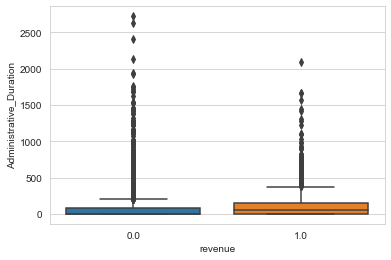

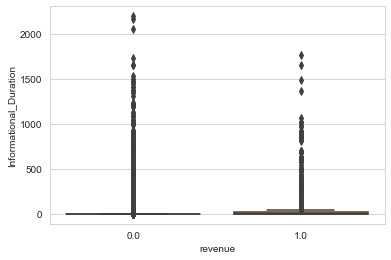

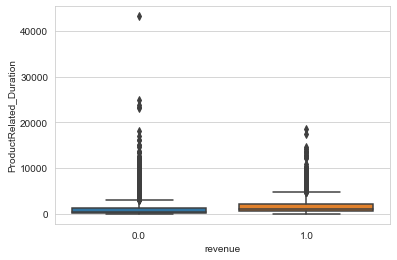

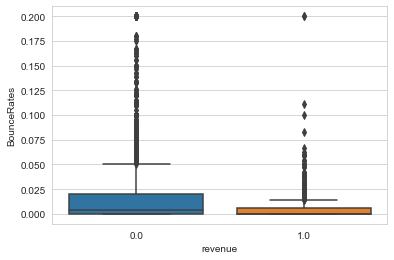

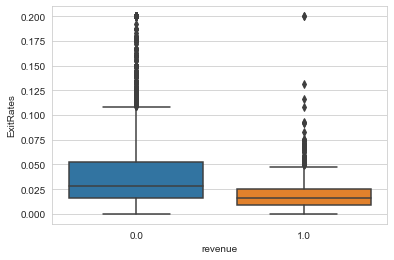

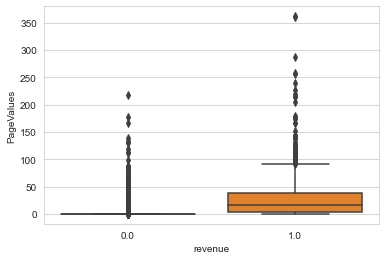

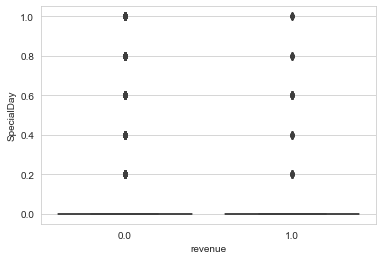

In [15]:
# data visualization
# visualize class separation by numeric features
def box_plot(df, cols, col_x = 'revenue'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = [ 'Administrative_Duration',  'Informational_Duration',
             'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues',
            'SpecialDay']
box_plot(df.loc['x'], num_cols)

In [16]:
# aggregating the coded features by forming clusters
# Create cluster feature
from sklearn.cluster import KMeans
cX = df.loc[:, coded_cols]
kmeans = KMeans(n_clusters=3)
df["Types"] = kmeans.fit_predict(cX)
df["Types"] = df["Types"].astype("category")

df.head()

Administrative  Administrative_Duration  Informational  \
x 0               0                      0.0              0   
  1               0                      0.0              0   
  2               0                      0.0              1   
  3               0                      0.0              0   
  4               0                      0.0              0   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
x 0                     0.0               5                81.083333   
  1                     0.0               3               189.000000   
  2                   132.0               8               445.000000   
  3                     0.0               3                 0.000000   
  4                     0.0               4                14.000000   

     BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
x 0         0.04   0.050000         0.0         0.0   Dec                 3   
  1         0.00   0.066667         0.0         0.0   Mar                 3   
  2         0.00   0.014286         0.0         0.0   Mar                 3   
  3         0.20   0.200000         0.0         0.0   Mar                 1   
  4         0.10   0.150000         0.0         0.0   Mar                 3   

     Browser  Region  TrafficType        VisitorType  Weekend  revenue Types  
x 0        2       1            2        New_Visitor        0      0.0     0  
  1        2       8            1  Returning_Visitor        0      0.0     2  
  2        2       4           14  Returning_Visitor        1      0.0     1  
  3        8       2            1  Returning_Visitor        0      0.0     0  
  4        2       1            1  Returning_Visitor        0      0.0     0

In [17]:
# aggregating the discrete numeric features by forming clusters
# Create cluster feature
from sklearn.cluster import KMeans
dX = df.loc[:, d_cols]
kmeans = KMeans(n_clusters=3)
df["Frequency"] = kmeans.fit_predict(dX)
df["Frequency"] = df["Frequency"].astype("category")

df.head()

Administrative  Administrative_Duration  Informational  \
x 0               0                      0.0              0   
  1               0                      0.0              0   
  2               0                      0.0              1   
  3               0                      0.0              0   
  4               0                      0.0              0   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
x 0                     0.0               5                81.083333   
  1                     0.0               3               189.000000   
  2                   132.0               8               445.000000   
  3                     0.0               3                 0.000000   
  4                     0.0               4                14.000000   

     BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
x 0         0.04   0.050000         0.0         0.0   Dec                 3   
  1         0.00   0.066667         0.0         0.0   Mar                 3   
  2         0.00   0.014286         0.0         0.0   Mar                 3   
  3         0.20   0.200000         0.0         0.0   Mar                 1   
  4         0.10   0.150000         0.0         0.0   Mar                 3   

     Browser  Region  TrafficType        VisitorType  Weekend  revenue Types  \
x 0        2       1            2        New_Visitor        0      0.0     0   
  1        2       8            1  Returning_Visitor        0      0.0     2   
  2        2       4           14  Returning_Visitor        1      0.0     1   
  3        8       2            1  Returning_Visitor        0      0.0     0   
  4        2       1            1  Returning_Visitor        0      0.0     0   

    Frequency  
x 0         0  
  1         0  
  2         0  
  3         0  
  4         0

In [18]:
df.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                  object
Weekend                       int32
revenue                     float64
Types                      category
Frequency                  category
dtype: object

<ipython-input-19-507e442f719c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dummy'] = np.ones(shape = df.shape[0])


Month


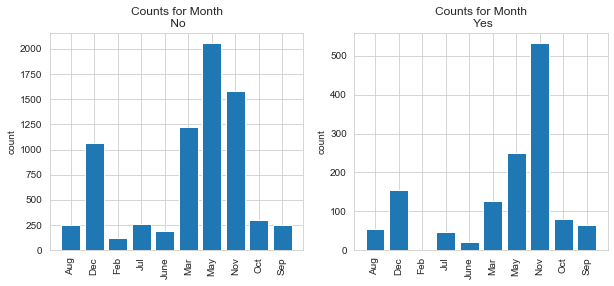

Types


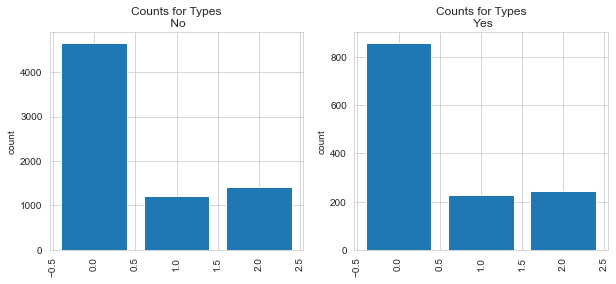

Frequency


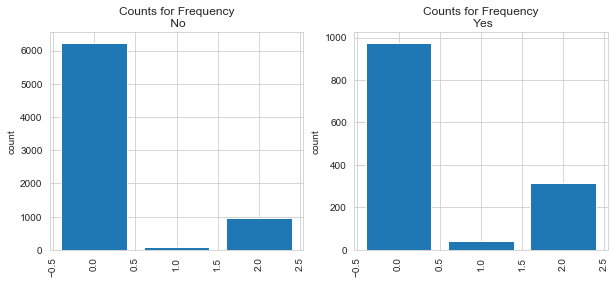

VisitorType


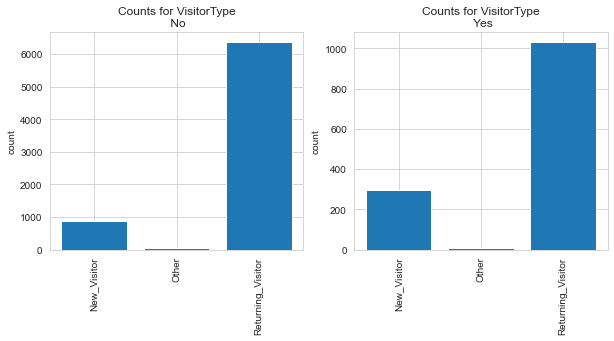

In [19]:
# visualize class separation by categorical features
def bar_plot(df, cols, target):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in cols:
        print(col)
        counts = df[['dummy', target, col]].groupby([target, col], as_index = False).count()
        temp = counts[counts[target] == 0][[col, 'dummy']]
        _ = plt.figure(figsize = (10,4))
        plt.subplot(1, 2, 1)
        temp = counts[counts[target] == 0.0][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n No')
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        temp = counts[counts[target] == 1.0][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n Yes')
        plt.ylabel('count')
        plt.show()
cat_cols = ['Month', 'Types', 'Frequency', 'VisitorType']
bar_plot(df.loc['x'], cat_cols, 'revenue')

In [20]:
# getting mutual information
X = df.loc['x'].copy()
Y = X.pop("revenue")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
# getting mutual information
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores

PageValues                 0.163364
ExitRates                  0.041612
ProductRelated_Duration    0.035829
BounceRates                0.026533
VisitorType                0.020880
Month                      0.018541
Informational              0.014037
Administrative_Duration    0.013777
TrafficType                0.013559
ProductRelated             0.013031
SpecialDay                 0.012172
Informational_Duration     0.011940
Frequency                  0.009466
Administrative             0.008486
Browser                    0.001940
Types                      0.000000
OperatingSystems           0.000000
Region                     0.000000
Weekend                    0.000000
Name: MI Scores, dtype: float64

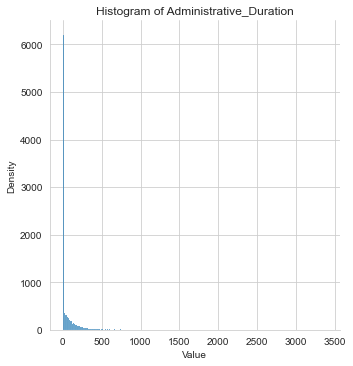

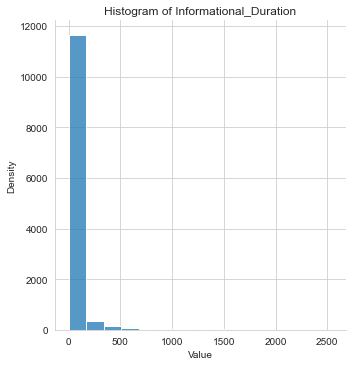

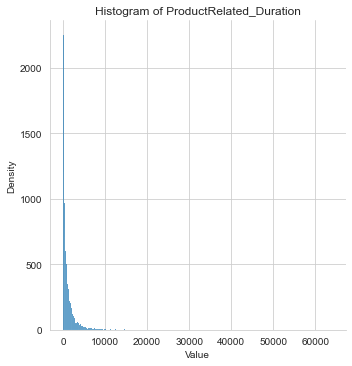

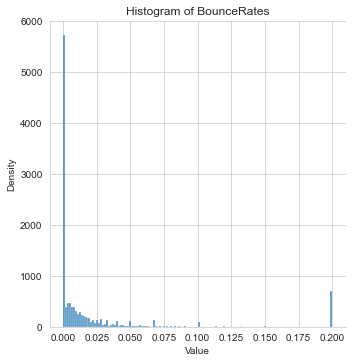

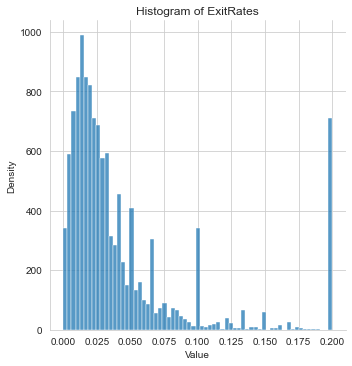

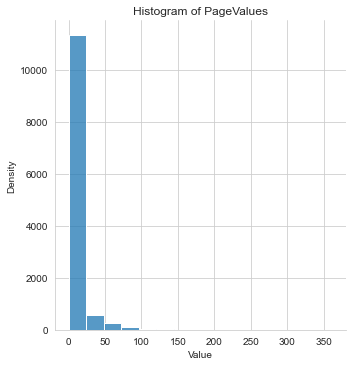

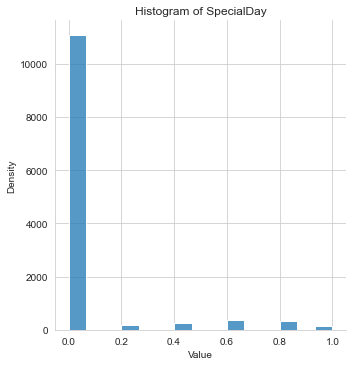

In [21]:
# checking for skewness of numerical columns
# histogram  numerical columns
def hist_plot(vals, lab):
    ## Distribution plot of values    
    sns.displot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    

for col in num_cols:
    hist_plot(df[col], col)

In [22]:
# scaling the numerical features
# min-max scale the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
x 0                      0.0                0.000000                 0.001267   
  1                      0.0                0.000000                 0.002954   
  2                      0.0                0.051777                 0.006956   
  3                      0.0                0.000000                 0.000000   
  4                      0.0                0.000000                 0.000219   

     BounceRates  ExitRates  PageValues  SpecialDay  
x 0          0.2   0.250000         0.0         0.0  
  1          0.0   0.333333         0.0         0.0  
  2          0.0   0.071429         0.0         0.0  
  3          1.0   1.000000         0.0         0.0  
  4          0.5   0.750000         0.0         0.0

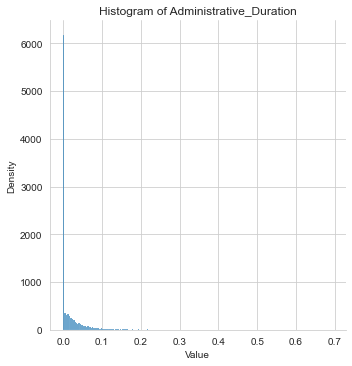

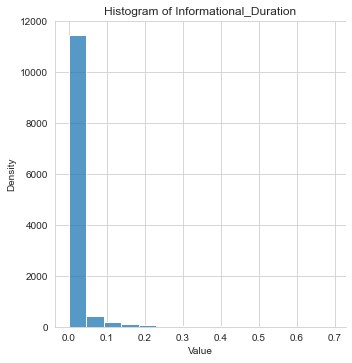

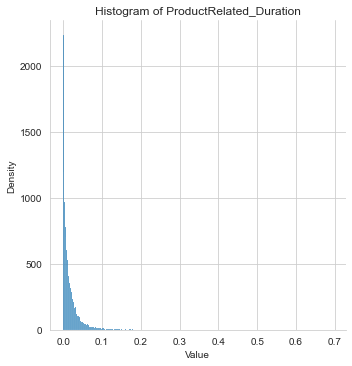

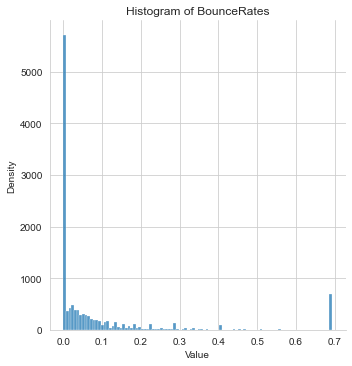

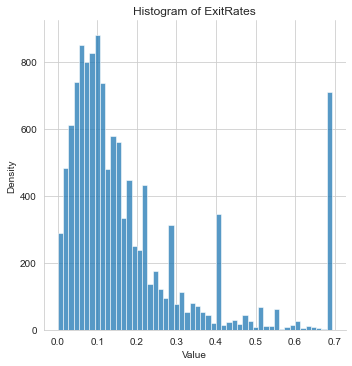

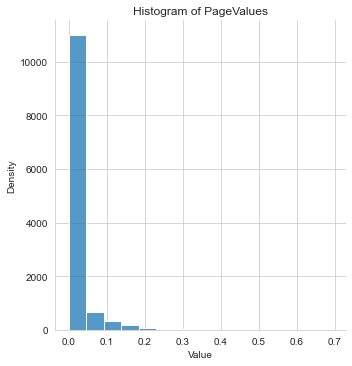

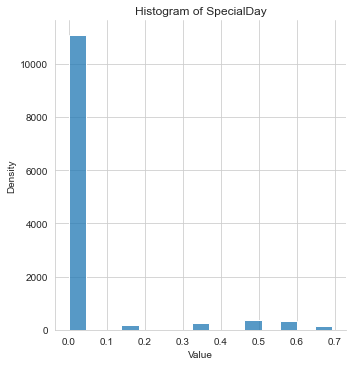

In [23]:
# transforming the numerical columns by using logarithm
for col in num_cols:
    df[col] = np.log1p(df[col])
# visualizing the distribution of log numerical columns
    hist_plot(df[col], col)

In [24]:
# performing pca
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(k[num_cols])

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.109026,-0.053024,-0.068044,0.014060,-0.037045,-0.012953,-0.025707,0.001377,0.001292,-0.000259
1,0.028496,-0.036415,-0.115089,-0.059728,0.104790,0.013824,0.020805,0.000495,0.001389,-0.000519
2,-0.125939,-0.023513,-0.096850,0.047914,0.008174,-0.044233,-0.037716,-0.002521,0.006640,0.001043
3,0.784274,-0.141784,0.063628,0.024211,-0.045431,-0.004941,-0.004785,-0.000608,0.000937,-0.001166
4,0.494496,-0.100303,-0.010197,-0.020462,0.037726,0.008311,0.014244,-0.000511,0.001118,-0.002879


In [25]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=k[num_cols].columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Administrative,-0.167557,-0.072406,0.840444,-0.417929,-0.019866,-0.015259,-0.013194,-0.286570,0.043487,0.029265
Administrative_Duration,-0.049703,-0.026034,0.267523,-0.096431,0.037335,-0.068792,-0.015771,0.949764,-0.030050,-0.081580
Informational,-0.038978,-0.016642,0.209701,0.418501,0.357573,-0.332571,-0.084434,-0.081093,-0.725869,0.005719
Informational_Duration,-0.026523,-0.011696,0.162366,0.429512,0.375935,-0.405240,-0.111524,-0.032388,0.683301,-0.048812
ProductRelated,-0.074948,0.000002,0.247828,0.472883,0.057229,0.693472,0.234185,-0.008279,0.029168,-0.411589
ProductRelated_Duration,-0.032588,-0.003418,0.113689,0.232379,0.063201,0.291221,0.110898,0.089618,0.050580,0.905709
BounceRates,0.686722,-0.114087,0.256405,0.294942,-0.566446,-0.106247,-0.174292,0.003155,-0.000486,0.011165
ExitRates,0.689782,-0.064863,0.003269,-0.295499,0.598315,0.137471,0.235649,-0.007461,0.000085,-0.014094
PageValues,-0.034513,-0.013598,0.026352,0.066803,-0.206309,-0.351988,0.909365,-0.005458,0.002725,-0.005124
SpecialDay,0.109430,0.988052,0.104668,-0.004655,-0.018748,-0.020411,0.004119,0.002384,-0.001581,0.002941


In [28]:
# creating a correlation matrix
# get correlations
df_corr = df.corr()
df_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,revenue
Administrative,1.000000,0.636826,0.376850,0.273006,0.431119,0.387020,-0.228280,-0.331492,0.109999,-0.096889,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.122744
Administrative_Duration,0.636826,1.000000,0.310065,0.243232,0.295880,0.344854,-0.158355,-0.232760,0.080940,-0.079576,-0.008367,-0.017181,-0.003229,-0.016163,0.017279,0.101268
Informational,0.376850,0.310065,1.000000,0.651332,0.374164,0.391235,-0.115312,-0.168189,0.055273,-0.049053,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.096333
Informational_Duration,0.273006,0.243232,0.651332,1.000000,0.288962,0.341651,-0.079770,-0.118014,0.040262,-0.033490,-0.010073,-0.020438,-0.027150,-0.027607,0.025462,0.075116
ProductRelated,0.431119,0.295880,0.374164,0.288962,1.000000,0.873270,-0.205128,-0.304631,0.061867,-0.025872,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.145703
ProductRelated_Duration,0.387020,0.344854,0.391235,0.341651,0.873270,1.000000,-0.196245,-0.276115,0.065096,-0.039140,0.003682,-0.007577,-0.032560,-0.039353,0.007966,0.154706
BounceRates,-0.228280,-0.158355,-0.115312,-0.079770,-0.205128,-0.196245,1.000000,0.887006,-0.134621,0.088581,0.025695,-0.019640,-0.008973,0.084324,-0.047923,-0.158313
ExitRates,-0.331492,-0.232760,-0.168189,-0.118014,-0.304631,-0.276115,0.887006,1.000000,-0.200236,0.116729,0.014213,-0.004777,-0.009741,0.081666,-0.065437,-0.219752
PageValues,0.109999,0.080940,0.055273,0.040262,0.061867,0.065096,-0.134621,-0.200236,1.000000,-0.067198,0.015159,0.043599,0.009726,0.009441,0.013071,0.516797
SpecialDay,-0.096889,-0.079576,-0.049053,-0.033490,-0.025872,-0.039140,0.088581,0.116729,-0.067198,1.000000,0.012195,0.003764,-0.017125,0.053901,-0.031032,-0.089830


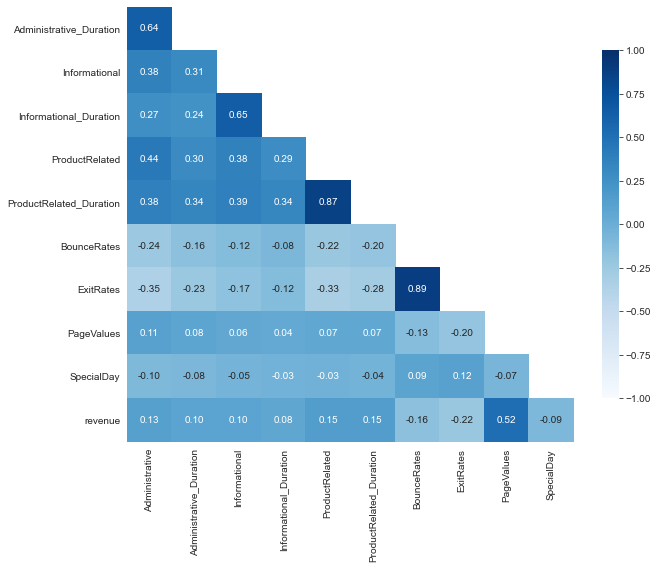

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [24]:
df.drop(['revenue'], axis=1, inplace=True)
df.head()

Administrative  Administrative_Duration  Informational  \
x 0               0                      0.0              0   
  1               0                      0.0              0   
  2               0                      0.0              1   
  3               0                      0.0              0   
  4               0                      0.0              0   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
x 0                0.000000               5                 0.001267   
  1                0.000000               3                 0.002950   
  2                0.050481               8                 0.006932   
  3                0.000000               3                 0.000000   
  4                0.000000               4                 0.000219   

     BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
x 0     0.182322   0.223144         0.0         0.0   Dec                 3   
  1     0.000000   0.287682         0.0         0.0   Mar                 3   
  2     0.000000   0.068993         0.0         0.0   Mar                 3   
  3     0.693147   0.693147         0.0         0.0   Mar                 1   
  4     0.405465   0.559616         0.0         0.0   Mar                 3   

     Browser  Region  TrafficType        VisitorType  Weekend Types Frequency  
x 0        2       1            2        New_Visitor        0     0         0  
  1        2       8            1  Returning_Visitor        0     2         0  
  2        2       4           14  Returning_Visitor        1     1         0  
  3        8       2            1  Returning_Visitor        0     0         0  
  4        2       1            1  Returning_Visitor        0     0         0

In [25]:
# creating train and test dataset for the logistic regression
train_set = df.loc['x']
train_set['revenue'] = train['revenue']
print(train_set.head())
test_set = df.loc['y']
test_set.head()

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              1   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                0.000000               5                 0.001267   
1                0.000000               3                 0.002950   
2                0.050481               8                 0.006932   
3                0.000000               3                 0.000000   
4                0.000000               4                 0.000219   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.182322   0.223144         0.0         0.0   Dec                 3   
1     0.000000   0.287682         0.0         0.0   Mar   

<ipython-input-25-49175e48cdd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['revenue'] = train['revenue']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Types,Frequency
0,3,0.041072,0,0.000000,48,0.016314,0.021506,0.063179,0.000000,0.0,Nov,1,8,6,11,Returning_Visitor,0,1,0
1,6,0.121059,2,0.088373,83,0.038393,0.010929,0.024283,0.005750,0.0,Mar,2,2,3,2,Returning_Visitor,0,0,2
2,1,0.012027,0,0.000000,126,0.065199,0.003433,0.062143,0.009494,0.0,Nov,2,2,2,2,Returning_Visitor,0,0,2
3,2,0.040648,0,0.000000,10,0.009438,0.040822,0.123937,0.096556,0.0,Aug,2,5,7,4,Returning_Visitor,0,2,0
4,18,0.164608,6,0.252963,168,0.074505,0.032621,0.065448,0.027672,0.0,Aug,2,2,3,1,Returning_Visitor,1,0,2


In [26]:
# creating a numpy array of label values
labels = np.array(train['revenue'])

In [27]:
# creating numpy feature array/model matrix for the train test
# encoding categorical variables as binary dummy variables
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Frequency', 'VisitorType']

Features = encode_string(train_set['Month'])
print(Features.shape)
for col in categorical_columns:
    temp = encode_string(train_set[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 

(8631, 10)
(8631, 16)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]]


In [28]:
# concentate numeric features
Features = np.concatenate([Features, np.array(train_set[[ 'BounceRates', 'ExitRates',
                                                         'PageValues']])], axis = 1)
print(Features.shape)
print(Features[:2, :]) 

(8631, 19)
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         1.         0.         0.         0.18232156 0.22314355
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         1.         0.         0.28768207
  0.        ]]


In [29]:
# creating numpy feature array/model matrix for test dataset
# encoding categorical variables as binary dummy variables
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = [ 'Frequency', 'VisitorType']

tFeatures = encode_string(test_set['Month'])
print(tFeatures.shape)
for col in categorical_columns:
    temp = encode_string(test_set[col])
    tFeatures = np.concatenate([tFeatures, temp], axis = 1)

print(tFeatures.shape)
print(tFeatures[:2, :]) 

(3699, 10)
(3699, 16)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]]


In [30]:
# concentate numeric features
tFeatures = np.concatenate([tFeatures, np.array(test_set[[ 'BounceRates', 
                            'ExitRates','PageValues']])], axis = 1)
print(tFeatures.shape)
print(tFeatures[:2, :]) 

(3699, 19)
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         1.         0.
  0.         0.         0.         1.         0.0215062  0.0631789
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         1.         0.01092907 0.02428344
  0.00575023]]


In [31]:
# scaling
scaler = preprocessing.StandardScaler().fit(Features)
Features = scaler.transform(Features)
tFeatures = scaler.transform(tFeatures)
Features[:2,]

array([[-0.19204507,  2.46938491, -0.11823816, -0.19333858, -0.15675666,
        -0.43154223, -0.60416604, -0.56990258, -0.21460434, -0.19366081,
         0.44413222, -0.12887115, -0.41747541,  2.51161569, -0.08436737,
        -2.43911364,  0.57497373,  0.276848  , -0.33660737],
       [-0.19204507, -0.40495914, -0.11823816, -0.19333858, -0.15675666,
         2.31727031, -0.60416604, -0.56990258, -0.21460434, -0.19366081,
         0.44413222, -0.12887115, -0.41747541, -0.39815008, -0.08436737,
         0.409985  , -0.50720147,  0.66124724, -0.33660737]])

In [32]:
# construct logistic regression
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(Features, labels)

LogisticRegression()

In [33]:
# examine model coefficients
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-2.30793296]
[[ 0.04732034 -0.1219101  -0.25050879  0.05114586 -0.02346802 -0.13131547
  -0.14891456  0.3392003   0.06184878  0.06425456 -0.08260705  0.05736664
   0.06574057  0.05135435 -0.06817856 -0.03401132 -0.29387057 -0.61445888
   1.4424766 ]]


In [34]:
# class probabilities
probabilities = logistic_mod.predict_proba(tFeatures)
print(probabilities[:15,:])

[[0.83019086 0.16980914]
 [0.87909458 0.12090542]
 [0.69846374 0.30153626]
 [0.32821377 0.67178623]
 [0.70137204 0.29862796]
 [0.97141964 0.02858036]
 [0.98014979 0.01985021]
 [0.97752894 0.02247106]
 [0.13750323 0.86249677]
 [0.90745776 0.09254224]
 [0.9104108  0.0895892 ]
 [0.8676252  0.1323748 ]
 [0.93038354 0.06961646]
 [0.97498196 0.02501804]
 [0.99453403 0.00546597]]


In [35]:
# scaling & evaluation
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores))

[0 0 0 ... 0 1 0]


In [36]:
# scores into dataframe
scores_df = pd.DataFrame(scores, columns=['revenue'])
scores_df.head()

,revenue
0,0
1,0
2,0
3,1
4,0


In [37]:
# creating id dataframe
result = test[['id']]
result.head()

,id
0,1
1,2
2,3
3,4
4,5


In [38]:
# joining the two dataframes
result = pd.concat([result, scores_df], axis=1)
result.head()

,id,revenue
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [39]:
result['revenue'].value_counts()

0    3420
1     279
Name: revenue, dtype: int64

In [40]:
# converting to csv file

result.to_csv('datasource8.csv')